In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# TRAIN DATASET PROCESSING

In [202]:
filepath = "Data_Train.csv"
data = pd.read_csv(filepath, error_bad_lines=False)

In [131]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [103]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [104]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [105]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [203]:
data["journey_day"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.day
data["journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
data.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [133]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [204]:
data["Dept_hrs"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dept_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"],axis = 1,inplace = True)

In [135]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dept_hrs,Dept_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [205]:
data.drop(["Additional_Info"], axis = 1, inplace = True)

In [206]:
stops = []
i = 0
for val in data["Total_Stops"]:
    if val == "non-stop":
        stops += [0]
        i+= 1
    else:
        li = str(val).split()
        if len(li) == 2:
            stops += [int(li[0])]
            i+= 1
        else:
            data.drop([i],axis = 0,inplace = True)
            i+=1
                
data.drop(["Total_Stops"], axis = 1, inplace = True)
data["Total_Stops"] = np.array(stops)

In [138]:
data["Total_Stops"].unique()

array([0, 2, 1, 3, 4])

In [139]:
data["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [208]:
duration = list(data["Duration"])
duration_hrs = []
duration_mins = []
i = 0
for val in duration:
    li = str(val).split()
    if len(li) == 2:
        duration_hrs += [int(li[0].rstrip("h"))]
        duration_mins += [int(li[1].rstrip("m"))]
        i += 1
    else:
        try:
            duration_hrs+= [int(li[0].rstrip("h"))]
            i += 1
        except:
            data.drop([i], axis = 0, inplace = True)
            i += 1
        duration_mins += [0]
        
# print(duration_hrs)
# print(duration_mins)

data["Duration_Hours"] = duration_hrs
data["Duration_Mins"] = duration_mins
data.drop(["Duration"], axis = 1, inplace = True)
data.drop(["Arrival_Time"], axis = 1, inplace = True)

        

In [142]:
data.head()

,Airline,Source,Destination,Route,Price,journey_day,journey_month,Dept_hrs,Dept_min,Total_Stops,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,3897,24,3,22,20,0,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7662,1,5,5,50,2,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,13882,9,6,9,25,2,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,6218,12,5,18,5,1,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,13302,1,3,16,50,1,4,45


# OneHotEncoding

In [209]:
Airline = data["Airline"]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [210]:
Source = data["Source"]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [211]:
Destination = data["Destination"]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [212]:
li = ["Airline","Source","Destination","Route"]
for field in li:
    data.drop([field],axis = 1,inplace = True)    

In [213]:
data_train = pd.concat([data,Airline,Source,Destination],axis = 1)

In [224]:
data_train.head()

,Price,journey_day,journey_month,Dept_hrs,Dept_min,Total_Stops,Duration_Hours,Duration_Mins,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,24,3,22,20,0,2,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,5,50,2,7,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2,13882,9,6,9,25,2,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,6218,12,5,18,5,1,5,25,0,0,...,0,0,0,1,0,0,0,0,0,0
4,13302,1,3,16,50,1,4,45,0,0,...,0,0,0,0,0,0,0,0,0,1


In [226]:
y = np.array(data_train["Price"])
data.drop(["Price"],axis = 1,inplace = True)
print(y.shape)

(10681,)


In [227]:
data_train.shape

(10681, 28)

# Visualisation of relation between features

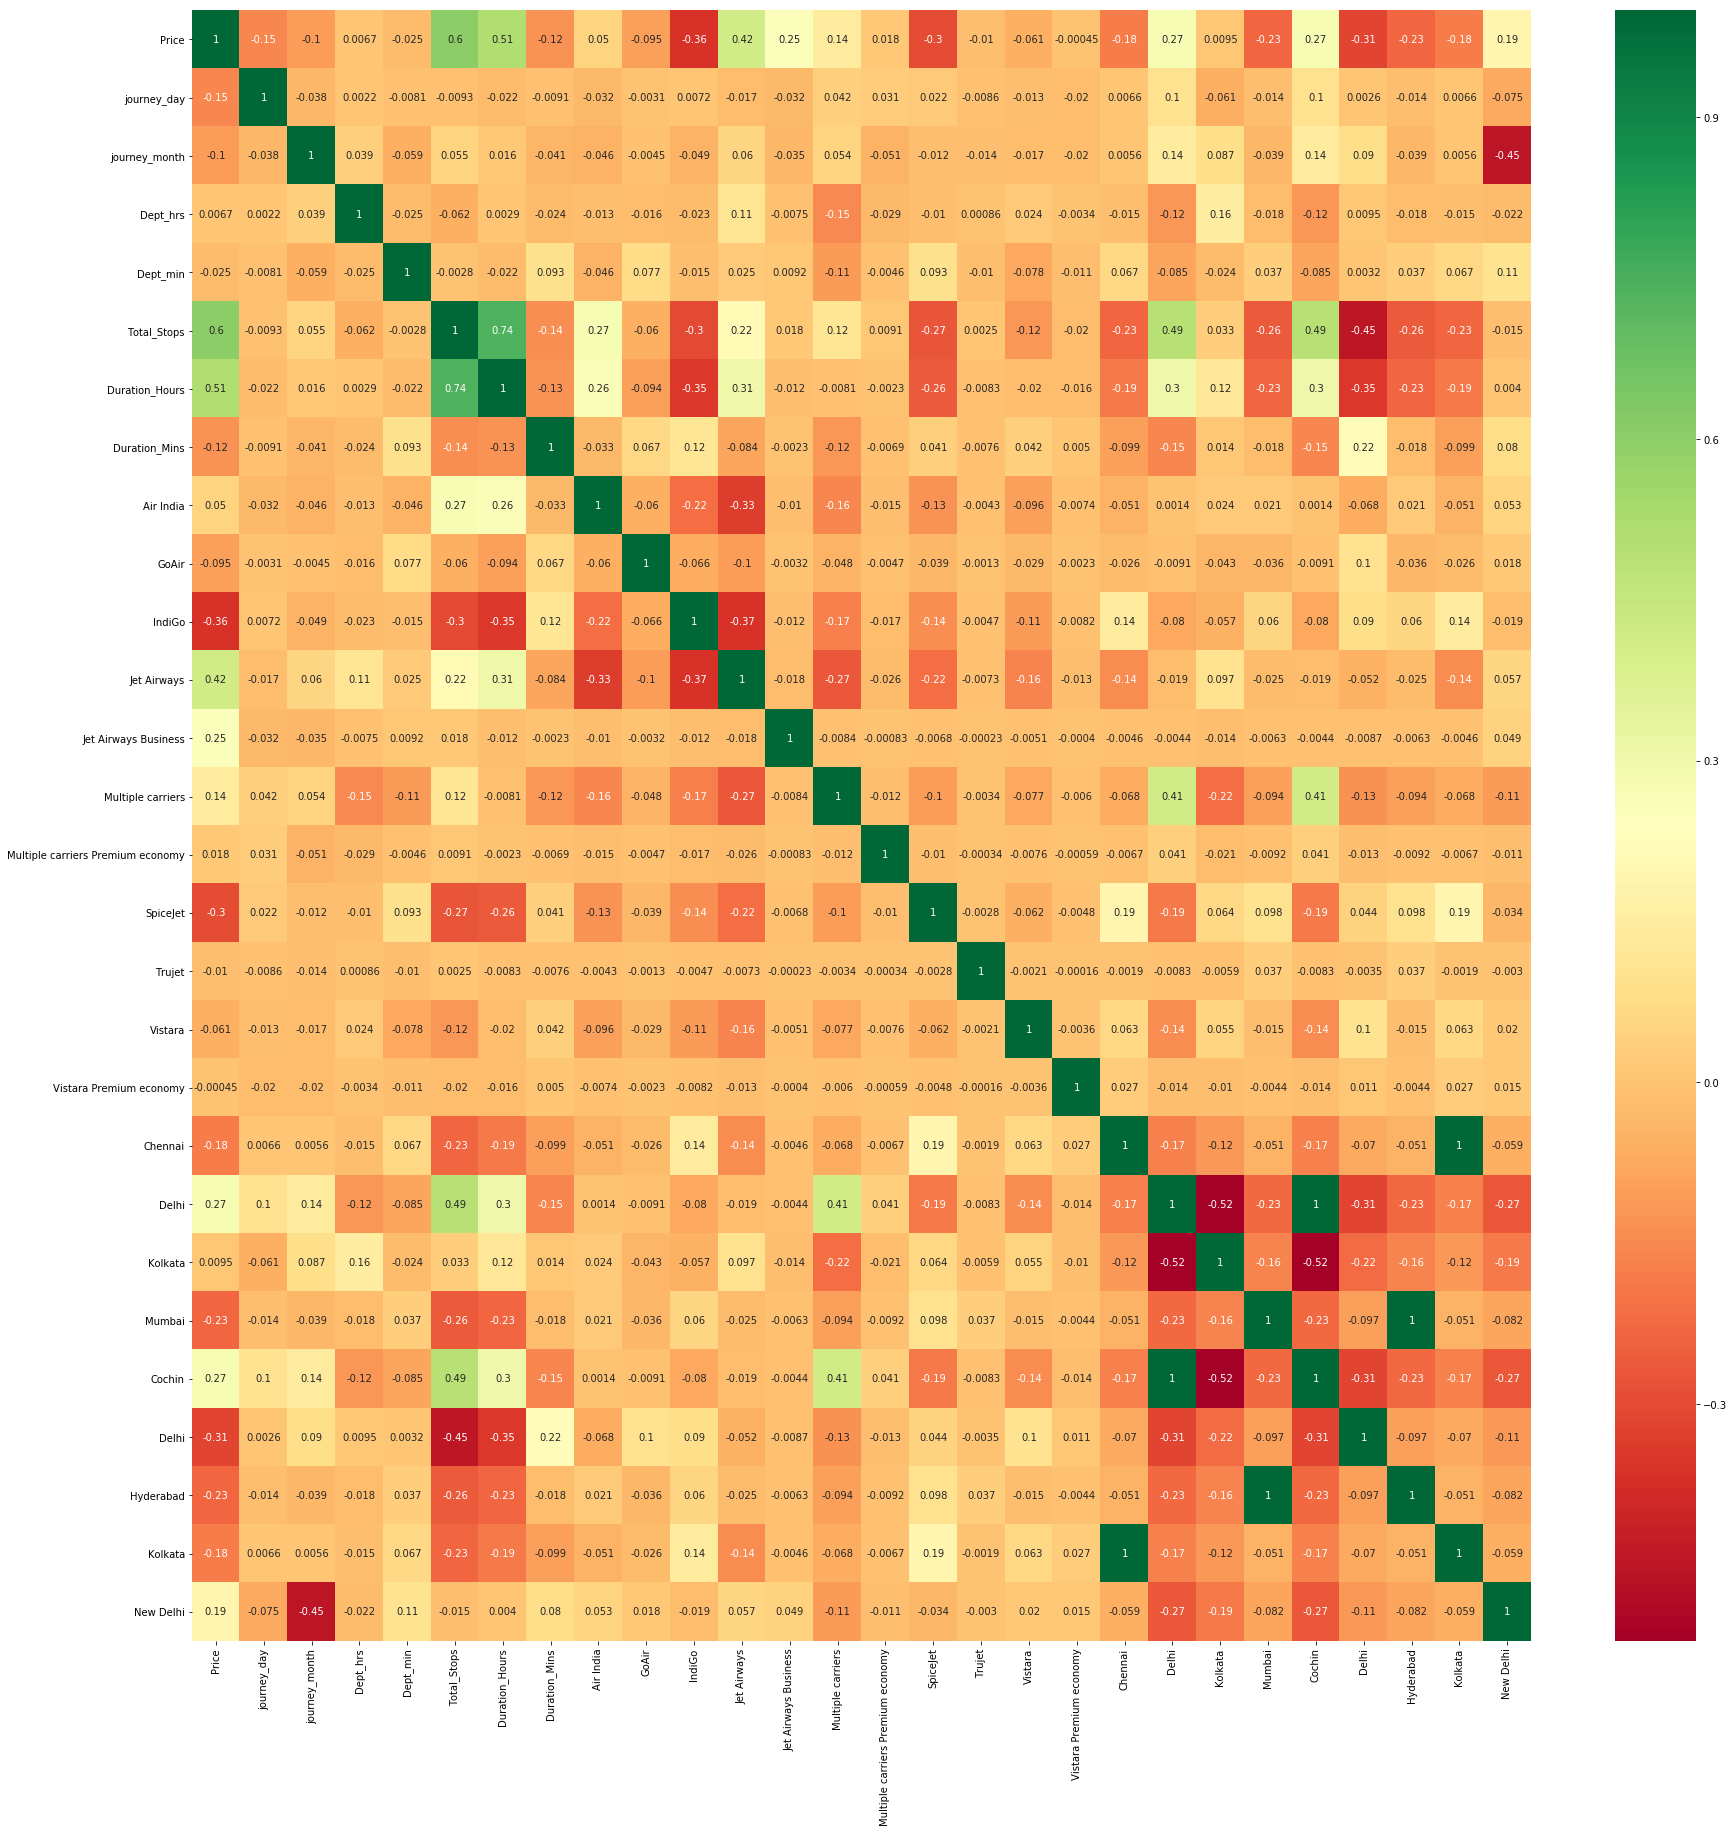

In [218]:
plt.figure(figsize = (30,30))
sns.heatmap(data_train.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

# TEST TRAIN SPLIT 

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train,y, test_size = 0.3, random_state = 20)

In [234]:
X_train.shape

(7476, 28)

In [235]:
y_train.shape

(7476,)

# RandomForestRegressor model

In [236]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

/Users/abhraneelsaha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [237]:
model.score(X_train,y_train)

/Users/abhraneelsaha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.9998635284787482

In [240]:
y_predict = model.predict(X_test)
print(model.score(X_test,y_test))

0.9997309589006731


/Users/abhraneelsaha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/Users/abhraneelsaha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 